<a href="https://colab.research.google.com/github/vanyagoncharov/CourseMLResourse/blob/main/%D0%94%D0%95%D0%9C%D0%9E_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F_31_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Решающие деревья



In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine, fetch_california_housing

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz

from sklearn.metrics import (accuracy_score, mean_squared_error,
                             r2_score,classification_report)
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (7, 5)

In [ ]:
# фиксируем для вопроизводимости
my_random_state = 12345

# Классификация с помощью решающих деревьев

In [ ]:
# Загрузка датасета Вин
wine = load_wine()
# X, y = wine.data, wine.target

X = pd.DataFrame(data=wine.data, columns=wine.feature_names)
y = wine.target
print(f"X shape: {X.shape}, Y shape: {y.shape}")
X.head()

X shape: (178, 13), Y shape: (178,)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


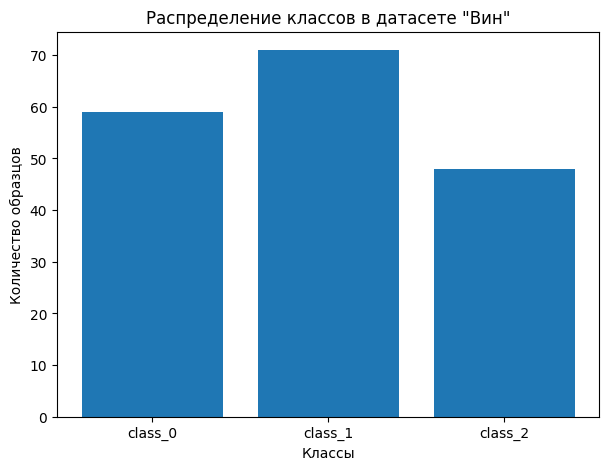

In [ ]:
# Посчитаем количество образцов для каждого класса
unique_classes, counts = np.unique(y, return_counts=True)

# Отобразим бар-плот
plt.bar(unique_classes, counts, tick_label=wine.target_names)
plt.xlabel('Классы')
plt.ylabel('Количество образцов')
plt.title('Распределение классов в датасете "Вин"')
plt.show()

Описание признаков (характеристик):

- Alcohol (Алкоголь): содержание алкоголя в вине (% по объему)
- Malic Acid (Яблочная кислота): содержание яблочной кислоты в вине (г/л)
- Ash (Зольность): содержание минералов, представленное зольностью (% по массе)
- Alcalinity of Ash (Щелочность золы): общая щелочность золы (г/л)
- Magnesium (Магний): содержание магния в вине (мг/л)
Total Phenols (Общие фенолы): общее содержание фенолов в вине (г/л)
- Flavanoids (Флавоноиды): содержание флавоноидов в вине (г/л)
- Nonflavanoid Phenols (Нефлавоноидные фенолы): содержание нефлавоноидных фенолов в вине (г/л)
- Proanthocyanins (Проантоцианидины): содержание проантоцианидинов в вине (г/л)
- Color Intensity (Интенсивность цвета): интенсивность цвета виноградного сока (от 1 до 10)
- Hue (Оттенок): оттенок вина, измеренный в градусах от 0 до 360
- OD280/OD315 of diluted wines (OD280/OD315 разбавленных вин): соотношение оптической плотности разбавленных вин при длине волны 280/315 нм
- Proline (Пролин): содержание пролина в вине (мг/л)

**Целевая переменная (классы):**

- Class_0: сорт 1
- Class_1: сорт 2
- Class_2: сорт 3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=my_random_state
)

dt_classifier = DecisionTreeClassifier(max_depth=2, random_state=my_random_state)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=12345)

In [ ]:
# Получение предсказанных меток классов на тестовой выборке
y_pred_test = dt_classifier.predict(X_test)
y_pred_train = dt_classifier.predict(X_train)
# Вычисление точности
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train, accuracy_test

(0.9112903225806451, 0.7407407407407407)

##Ранняя остановка

### параметр максимальная глубина

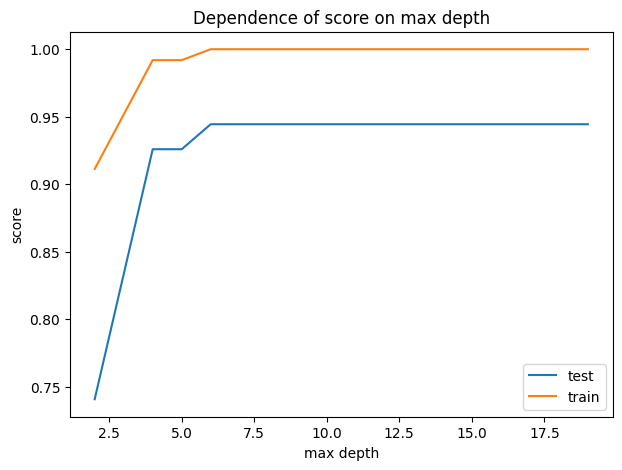

In [ ]:
max_depth_array = range(2, 20)
score_array_test = []
score_array_train = []

for max_depth in max_depth_array:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=my_random_state)
    dt.fit(X_train, y_train)
    score_array_test.append(accuracy_score(y_test, dt.predict(X_test)))
    score_array_train.append(accuracy_score(y_train, dt.predict(X_train)))

plt.plot(max_depth_array, score_array_test, label='test')
plt.plot(max_depth_array, score_array_train, label='train')
plt.title("Dependence of score on max depth")
plt.xlabel("max depth")
plt.ylabel("score")
plt.legend()
plt.show()

In [ ]:
pd.DataFrame({"max_depth": max_depth_array, "score": score_array_test}).sort_values(
    by="score"
).reset_index(drop=True).sort_values('max_depth')

,max_depth,score
0,2,0.740741
1,3,0.833333
2,4,0.925926
3,5,0.925926
15,6,0.944444
14,7,0.944444
13,8,0.944444
12,9,0.944444
10,10,0.944444
16,11,0.944444


### минимальный размер листа

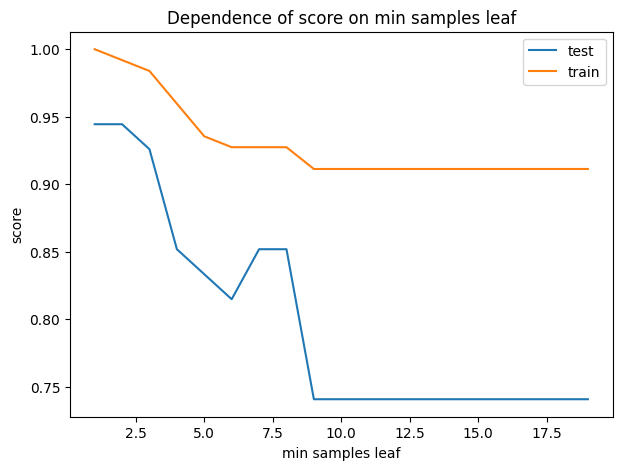

In [ ]:
min_samples_leaf_array = range(1, 20)
score_array_test = []
score_array_train = []

for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeClassifier(
        max_depth=None, min_samples_leaf=min_samples_leaf, random_state=my_random_state
    )
    dt.fit(X_train, y_train)
    score_array_test.append(accuracy_score(y_test, dt.predict(X_test)))
    score_array_train.append(accuracy_score(y_train, dt.predict(X_train)))

plt.plot(min_samples_leaf_array, score_array_test, label='test')
plt.plot(min_samples_leaf_array, score_array_train, label='train')
plt.title("Dependence of score on min samples leaf")
plt.xlabel("min samples leaf")
plt.ylabel("score")
plt.legend()
plt.show()

### минимальный размер узла, который можно разделить

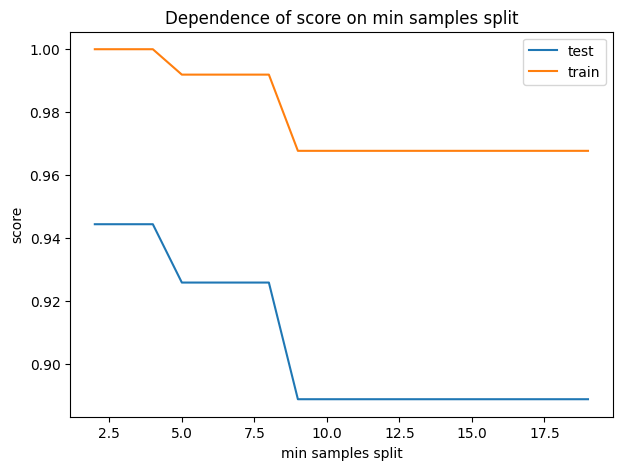

In [ ]:
min_samples_split_array = range(2, 20)
score_array_test = []
score_array_train = []

for min_samples_split in min_samples_split_array:
    dt = DecisionTreeClassifier(
        max_depth=None, min_samples_split=min_samples_split, random_state=my_random_state
    )
    dt.fit(X_train, y_train)
    score_array_test.append(accuracy_score(y_test, dt.predict(X_test)))
    score_array_train.append(accuracy_score(y_train, dt.predict(X_train)))

plt.plot(min_samples_split_array, score_array_test, label='test')
plt.plot(min_samples_split_array, score_array_train, label='train')
plt.title("Dependence of score on min samples split")
plt.xlabel("min samples split")
plt.ylabel("score")
plt.legend()
plt.show()

##Pruning

In [ ]:
# X, y = load_breast_cancer(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

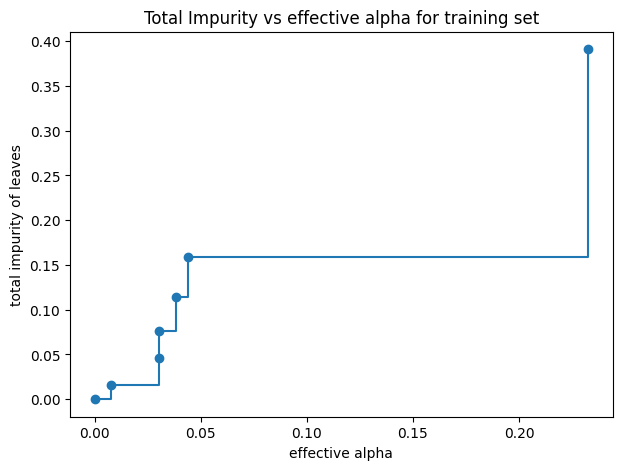

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Чем меньше $α$, тем чище листы деревье, то есть меньше ошибка

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2607989045293935


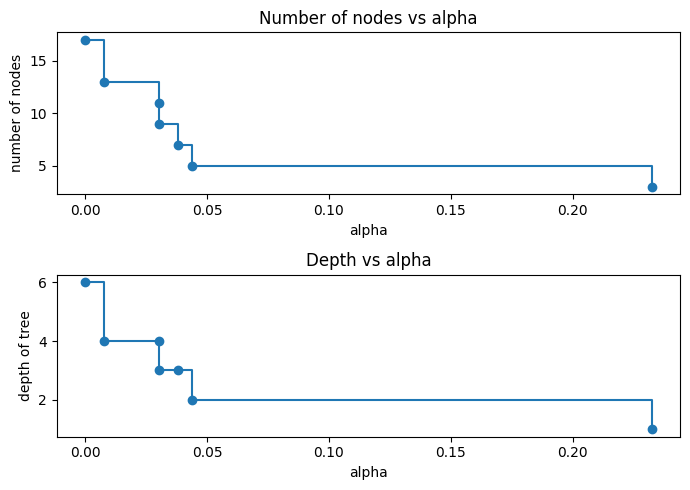

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

[0.         0.00789651 0.03024194 0.03033602 0.03820078 0.04398827
 0.23243608]


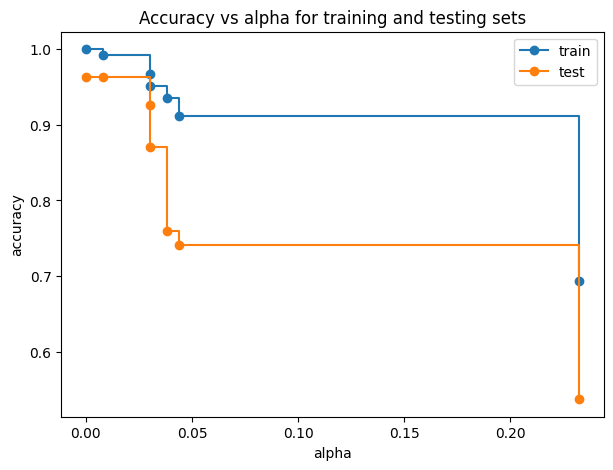

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
print(ccp_alphas)
plt.show()


#Подбор гиперпараметров

In [ ]:
dt_classifier = DecisionTreeClassifier()

In [ ]:
# Определение сетки параметров для GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Создаем объект GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1)


In [ ]:

# Обучаем GridSearch на обучающей выборке
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
# Выводим наилучшие параметры и точность на тестовой выборке
print("Наилучшие параметры: ", grid_search.best_params_)
print("Точность на тестовой выборке: ", grid_search.best_score_)

Наилучшие параметры:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Точность на тестовой выборке:  0.9356666666666665


In [ ]:
# Преобразуем результаты GridSearchCV в DataFrame
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008972,0.008488,0.003093,0.000870,gini,None,1,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.84,0.92,0.80,0.88,0.916667,0.871333,0.045976,70
1,0.003358,0.000133,0.002307,0.000029,gini,None,1,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.92,0.92,0.80,0.88,0.958333,0.895667,0.053868,42
2,0.004056,0.001034,0.004719,0.003254,gini,None,1,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.88,0.92,0.68,0.88,0.916667,0.855333,0.089333,86
3,0.003571,0.000057,0.002530,0.000147,gini,None,2,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.88,0.92,0.80,0.88,0.958333,0.887667,0.052616,56
4,0.003612,0.000188,0.002494,0.000181,gini,None,2,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.84,0.92,0.84,0.88,0.916667,0.879333,0.035049,64


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt_classifier = DecisionTreeClassifier(**grid_search.best_params_)

# Выполняем кросс-валидацию с k фолдами (k-fold cross-validation)
# cv=k означает, что данные разделятся на k частей, и k раз происходит обучение и оценка модели
# scoring='accuracy' означает, что оценка производится на основе точности классификации
k = 5
scores = cross_val_score(clf, X, y, cv=k, scoring='accuracy')

# Выводим результаты кросс-валидации
print("Scores:", scores)
print("Mean Accuracy:", np.mean(scores))


Scores: [0.80555556 0.66666667 0.38888889 0.4        0.42857143]
Mean Accuracy: 0.5379365079365079


In [ ]:
# Вычисление среднего значения
mean_value = np.mean(scores)

# Вычисление дисперсии
variance = np.var(scores)

print("Среднее значение:", mean_value)
print("Дисперсия:", variance)

Среднее значение: 0.5379365079365079
Дисперсия: 0.02827876039304611


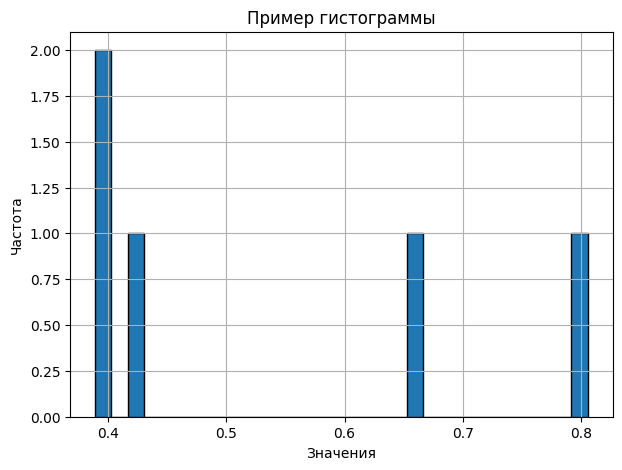

In [ ]:
# Построение гистограммы
plt.hist(scores, bins=30, edgecolor='black')  # data - данные, bins - количество интервалов, edgecolor - цвет границ столбцов
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Пример гистограммы')
plt.grid(True)
plt.show()

## Feature importance

In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth=2, random_state=my_random_state)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=12345)

In [ ]:
dt_classifier.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.47124817, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.52875183])

In [ ]:
pd.DataFrame(
    {"feature": X.columns, "importance": dt_classifier.feature_importances_}
).sort_values(by="importance", ascending=False).reset_index(drop=True)

,feature,importance
0,proline,0.528752
1,flavanoids,0.471248
2,alcohol,0.000000
3,malic_acid,0.000000
4,ash,0.000000
5,alcalinity_of_ash,0.000000
6,magnesium,0.000000
7,total_phenols,0.000000
8,nonflavanoid_phenols,0.000000
9,proanthocyanins,0.000000


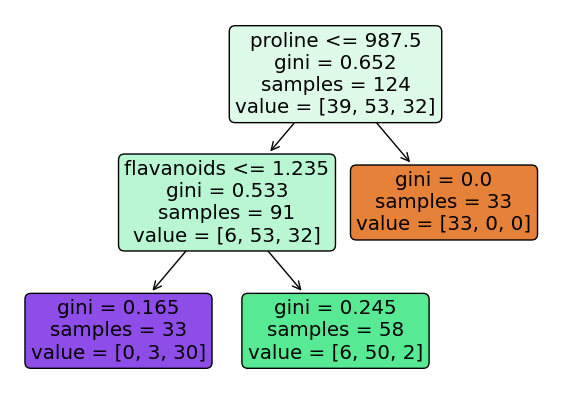

In [ ]:
plot_tree(dt_classifier, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [ ]:
f1 = 0.652*1 - 91/124*0.533 - 33/124*0
f1

0.2608467741935484

In [ ]:
f2 = 0.533*91/124 - 0.165*33/124 - 0.245*58/124
f2

0.23264516129032256

In [ ]:
f1/(f1+f2)

0.5285735296520845

In [ ]:
f2/(f1+f2)

0.4714264703479156

##Влияет ли стандартизация (масштабирование) признаков на результат работы решающего дерева?

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train_scaled = pd.DataFrame(
    sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index
)
X_test_scaled = pd.DataFrame(
    sc.transform(X_test), columns=X_test.columns, index=X_test.index
)
X_train_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
110,-1.878979,1.161398,-1.958366,0.013210,0.669727,1.439035,0.606807,-0.963773,3.401659,-0.876875,-0.976929,0.303212,-0.549673
98,-0.755256,-1.088679,-0.914546,-0.274160,-0.719249,1.976553,1.811617,-0.963773,0.641106,-0.147922,0.282224,0.241802,-0.252457
92,-0.360101,-0.701025,-0.318077,0.358054,-1.304080,-1.406651,-0.546516,1.770592,0.082221,-0.808535,-0.065129,-0.848225,-0.752872
95,-0.631770,-0.709453,-0.541753,-0.130475,4.690444,0.363998,0.287583,-0.320393,2.893582,-1.013553,0.803253,0.026867,0.587633
15,0.800667,-0.465062,1.322213,-0.647741,1.035246,0.917326,0.946625,-0.481238,-0.188753,1.127746,1.324281,0.410679,1.718873


In [ ]:
print("No scaling is applied\n")

for max_depth in [3, 6]:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=my_random_state)
    dt.fit(X_train, y_train)
    print(
        f"MSE on test set for depth {max_depth}: {accuracy_score(y_test, dt.predict(X_test)):.2f}"
    )

No scaling is applied

MSE on test set for depth 3: 0.83
MSE on test set for depth 6: 0.94


In [ ]:
pd.DataFrame(
    {"feature": X.columns, "importance": dt.feature_importances_}
).sort_values(by="importance", ascending=False).reset_index(drop=True)

,feature,importance
0,proline,0.464404
1,flavanoids,0.356609
2,hue,0.067488
3,color_intensity,0.064957
4,od280/od315_of_diluted_wines,0.046542
5,alcohol,0.000000
6,malic_acid,0.000000
7,ash,0.000000
8,alcalinity_of_ash,0.000000
9,magnesium,0.000000


In [ ]:
print("Standard scaling is applied\n")

for max_depth in [3, 6]:
    dt_sc = DecisionTreeClassifier(max_depth=max_depth, random_state=my_random_state)
    dt_sc.fit(X_train_scaled, y_train)
    print(
        f"MSE on test set for depth {max_depth}: {accuracy_score(y_test, dt_sc.predict(X_test_scaled)):.2f}"
    )

Standard scaling is applied

MSE on test set for depth 3: 0.83
MSE on test set for depth 6: 0.94


In [ ]:
pd.DataFrame(
    {"feature": X.columns, "importance": dt_sc.feature_importances_}
).sort_values(by="importance", ascending=False).reset_index(drop=True)

,feature,importance
0,proline,0.464404
1,flavanoids,0.356609
2,hue,0.067488
3,color_intensity,0.064957
4,od280/od315_of_diluted_wines,0.046542
5,alcohol,0.000000
6,malic_acid,0.000000
7,ash,0.000000
8,alcalinity_of_ash,0.000000
9,magnesium,0.000000


##Визуализация

In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=my_random_state)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=12345)

In [ ]:
text_representation = export_text(dt_classifier)
print(text_representation)

|--- feature_12 <= 987.50
|   |--- feature_6 <= 1.24
|   |   |--- feature_10 <= 0.93
|   |   |   |--- class: 2
|   |   |--- feature_10 >  0.93
|   |   |   |--- class: 1
|   |--- feature_6 >  1.24
|   |   |--- feature_12 <= 744.00
|   |   |   |--- class: 1
|   |   |--- feature_12 >  744.00
|   |   |   |--- class: 0
|--- feature_12 >  987.50
|   |--- class: 0



In [ ]:
# Визуализация дерева решений с помощью Graphviz
dot_data = export_graphviz(dt_classifier, out_file=None,
                           feature_names=wine.feature_names,
                           class_names=wine.target_names,
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("wine_tree")  # Сохраняем дерево в файл "wine_tree.pdf"
graph.view()  # Открываем дерево во внешнем просмотрщике (например, Graphviz или pdf-reader)


'wine_tree.pdf'

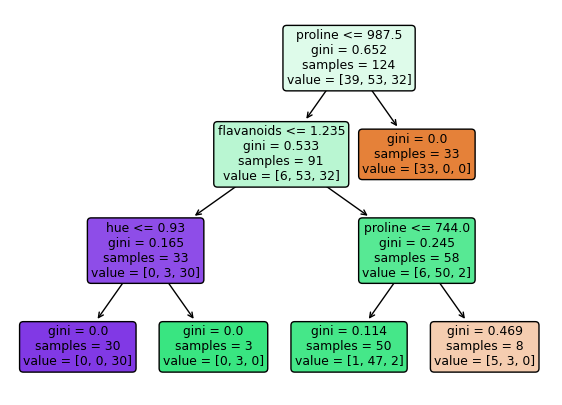

In [ ]:
# второй способ отрисовать деревья с помощью plot_tree
plot_tree(dt_classifier, feature_names=X.columns, filled=True, rounded=True)
plt.show()

##Регрессионное дерево

In [ ]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseValue')

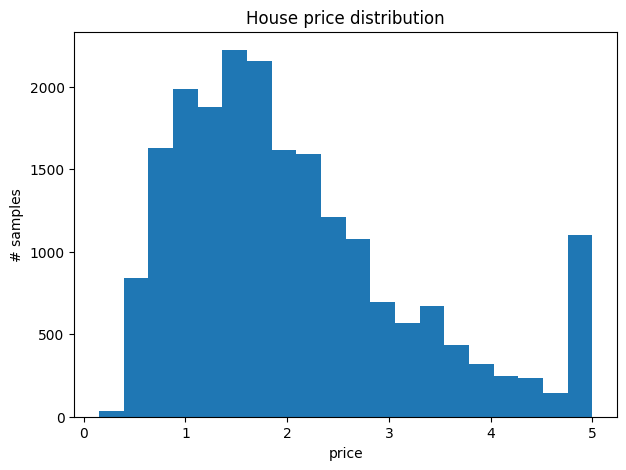

In [ ]:
plt.title("House price distribution")
plt.xlabel("price")
plt.ylabel("# samples")
plt.hist(y, bins=20)
plt.show()

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
# Подготовка данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Создание и обучение модели дерева решений с поиском по сетке
param_grid = {
    'max_depth': [ 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.1, 1, 10]
}

regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_regressor = grid_search.best_estimator_


In [ ]:
# Оценка модели с оптимальными параметрами
y_pred = best_regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)


mse_train = mean_squared_error(y_train, best_regressor.predict(X_train))
r2_train = r2_score(y_train, best_regressor.predict(X_train))

print("Best Parameters:", best_params)
print("Mean Squared Error (MSE) TEST:", mse_test, "Mean Squared Error (MSE) TRAIN:", mse_train)
print("R-squared (R2) test:", r2_test, "R-squared (R2) train:", r2_train )


Best Parameters: {'ccp_alpha': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error (MSE) TEST: 0.8223252869885497 Mean Squared Error (MSE) TRAIN: 0.8069279695888685
R-squared (R2) test: 0.3724666873906468 R-squared (R2) train: 0.39636361329625114


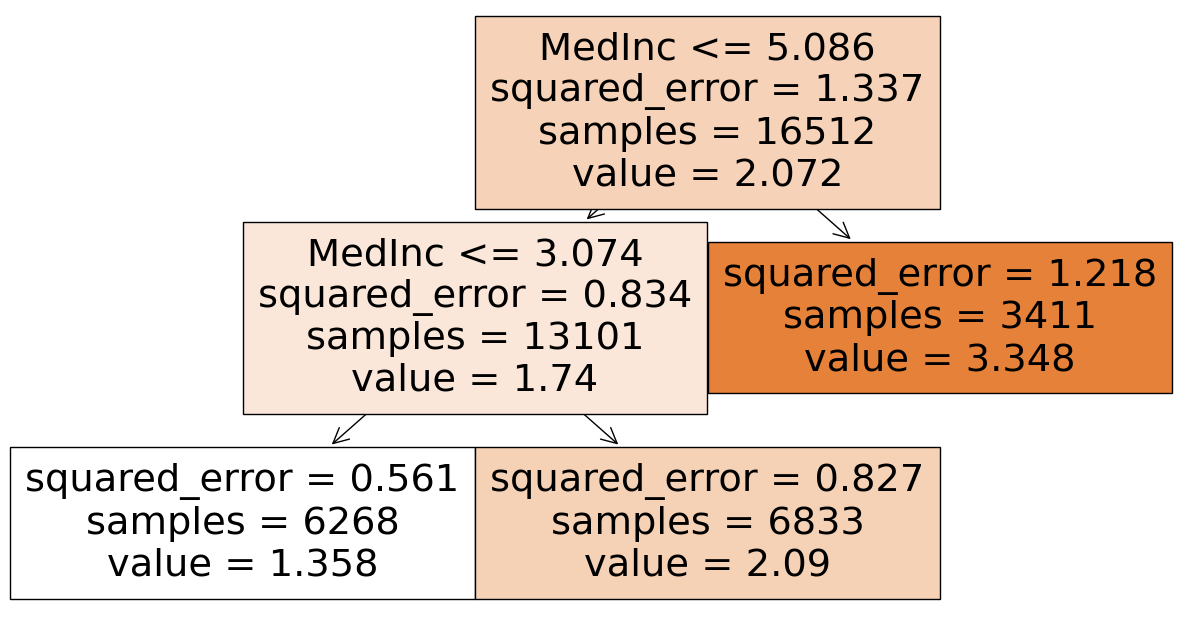

In [ ]:

# Шаг 5: Визуализация дерева решений
plt.figure(figsize=(15, 8))
plot_tree(best_regressor, filled=True, feature_names=data.feature_names)
plt.show()

In [ ]:
# Сохранение результатов кросс-валидации
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.240990,0.022244,0.010676,0.006664,0.1,3,1,2,"{'ccp_alpha': 0.1, 'max_depth': 3, 'min_sample...",-0.82554,-0.780218,-0.82747,-0.803858,-0.835029,-0.814423,0.02,1
1,0.234661,0.023180,0.010608,0.005517,0.1,3,1,5,"{'ccp_alpha': 0.1, 'max_depth': 3, 'min_sample...",-0.82554,-0.780218,-0.82747,-0.803858,-0.835029,-0.814423,0.02,1
2,0.176302,0.004268,0.017141,0.009053,0.1,3,1,10,"{'ccp_alpha': 0.1, 'max_depth': 3, 'min_sample...",-0.82554,-0.780218,-0.82747,-0.803858,-0.835029,-0.814423,0.02,1
3,0.185461,0.036515,0.005212,0.003545,0.1,3,2,2,"{'ccp_alpha': 0.1, 'max_depth': 3, 'min_sample...",-0.82554,-0.780218,-0.82747,-0.803858,-0.835029,-0.814423,0.02,1
4,0.176036,0.019592,0.015713,0.009611,0.1,3,2,5,"{'ccp_alpha': 0.1, 'max_depth': 3, 'min_sample...",-0.82554,-0.780218,-0.82747,-0.803858,-0.835029,-0.814423,0.02,1
